In [1]:
import numpy as np
import pandas as pd
df=pd.read_csv("forestfires.csv")
df.shape

(517, 31)

In [4]:
df.head()


,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    int64  
 1   day            517 non-null    int64  
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

In [5]:
# Univariate Analysis
# Get descriptive statistics for a single variable (continious)
df.describe()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,...,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292,0.164410,...,0.017408,0.038685,0.003868,0.061896,0.032882,0.104449,0.003868,0.001934,0.029014,0.332689
std,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818,0.371006,...,0.130913,0.193029,0.062137,0.241199,0.178500,0.306138,0.062137,0.043980,0.168007,0.471632
min,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
# Bivariate Analysis
# Get correlation between two variables temp and wind
df["temp"].corr(df["wind"])

-0.2271162203706694

In [7]:
# Multivariate Analysis
# Perform linear regression with multiple variables
import statsmodels.api as sm
x_mv = df[["rain", "wind"]]
y_mv = df["temp"]
model = sm.OLS(y_mv, x_mv).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   temp   R-squared (uncentered):                   0.716
Model:                            OLS   Adj. R-squared (uncentered):              0.715
Method:                 Least Squares   F-statistic:                              649.1
Date:                Tue, 05 Mar 2024   Prob (F-statistic):                   1.72e-141
Time:                        11:22:05   Log-Likelihood:                         -1950.8
No. Observations:                 517   AIC:                                      3906.
Df Residuals:                     515   BIC:                                      3914.
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
rain           0.8562      1.572      0.545      0.586      -2.232       3.944
wind           3.7958      0.106     35.826      0.000       3.588       4.004
==============================================================================
Omnibus:                       41.104   Durbin-Watson:                   1.259
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               48.901
Skew:                          -0.709   Prob(JB):                     2.41e-11
Kurtosis:                       3.510   Cond. No.                         14.9
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [8]:
#Label Encoding the obj Dtypes
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
for column in df.select_dtypes(include=["object"]):
    df[column] = LE.fit_transform(df[column])
df.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,7,0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,1
1,10,5,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,1
2,10,2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,1
3,7,0,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,1
4,7,3,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,1


In [9]:
#choosing X and Y variables
y=df["size_category"]
x=df.iloc[:,0:-1]
x.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
0,7,0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,0,1,0,0,0,0
1,10,5,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,0,1,0
2,10,2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,0,1,0
3,7,0,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,0,1,0,0,0,0
4,7,3,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,0,1,0,0,0,0


In [10]:
#standardization will fit the values b/w -3 to +3

from sklearn.preprocessing import StandardScaler
SS=StandardScaler()
SS_x = SS.fit_transform(x)
SS_x = pd.DataFrame(SS_x)
#giving columns names to the converted data
SS_x.columns = list(x)
SS_x.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
0,0.284222,-1.423121,-0.805959,-1.323326,-1.830477,-0.860946,-1.842640,0.411724,1.498614,-0.073268,...,-0.133103,-0.200603,-0.062318,-0.256865,-0.184391,2.928152,-0.062318,-0.044023,-0.172860,-0.706081
1,0.970871,1.176715,-0.008102,-1.179541,0.488891,-0.509688,-0.153278,-0.692456,-1.741756,-0.073268,...,-0.133103,-0.200603,-0.062318,-0.256865,-0.184391,-0.341512,-0.062318,-0.044023,5.785038,-0.706081
2,0.970871,-0.383187,-0.008102,-1.049822,0.560715,-0.509688,-0.739383,-0.692456,-1.518282,-0.073268,...,-0.133103,-0.200603,-0.062318,-0.256865,-0.184391,-0.341512,-0.062318,-0.044023,5.785038,-0.706081
3,0.284222,-1.423121,0.191362,-1.212361,-1.898266,-0.004756,-1.825402,3.233519,-0.009834,0.603155,...,-0.133103,-0.200603,-0.062318,-0.256865,-0.184391,2.928152,-0.062318,-0.044023,-0.172860,-0.706081
4,0.284222,0.136781,-0.243833,-0.931043,-1.798600,0.126966,-1.291012,3.356206,-1.238940,-0.073268,...,-0.133103,-0.200603,-0.062318,-0.256865,-0.184391,2.928152,-0.062318,-0.044023,-0.172860,-0.706081


In [11]:
#Data partition
#test_size = 0.30 (train:test = 70:30)
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(SS_x,y,test_size=0.30)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(361, 30)
(156, 30)
(361,)
(156,)


In [14]:
#SVM Approach ----------linear classifier--------------------
#fitting model
#taking C as random values #1,2,3,4,5
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
svc = SVC(C=2,kernel='linear')
#model fitting
svc.fit(x_train,y_train)
y_pred_train = svc.predict(x_train)
y_pred_test = svc.predict(x_test)
ac1=accuracy_score(y_train,y_pred_train)
ac2=accuracy_score(y_test,y_pred_test)
print("Trainig accuracy for"," =  ",ac1.round(3))
print("Test accuracy for","= ",ac2.round(3))
print("Variance between Training and Testing :",(ac1-ac2).round(3))


Trainig accuracy for  =   0.936
Test accuracy for =  0.917
Variance between Training and Testing : 0.02


In [16]:
#SVM Approach ----------linear classifier--------------------
#fitting model
#taking C as random values #1,2,3,4,5
#cross validation method
#validation set approach
#random state = we wre not shuffling the data
#test_size = 0.30 (train:test = 70:30)
for i in range(1,6):
  from sklearn.metrics import accuracy_score
  from sklearn.svm import SVC
  svc = SVC(C=i,kernel='linear')
  training_accuracy = []
  test_accuracy = []
  for p in range(1,101):
    x_train,x_test,y_train,y_test = train_test_split(SS_x,y,test_size=0.30,random_state=p)
    svc.fit(x_train,y_train)
    y_pred_train = svc.predict(x_train)
    y_pred_test = svc.predict(x_test)
    training_accuracy.append(accuracy_score(y_train,y_pred_train))
    test_accuracy.append(accuracy_score(y_test,y_pred_test))
    ac1=np.mean(training_accuracy)
    ac2=np.mean(test_accuracy)
  print("Cross validation Trainig accuracy for  linear classifier","C =",i,": ",np.mean(training_accuracy).round(2))
  print("Cross validation Test accuracy for linear classifier ","C =",i,": ",np.mean(test_accuracy).round(2))
  print("Variance between Training and Testing for linear classifier :","for C=",i,":",(ac1-ac2).round(3))
  print(" ")

Cross validation Trainig accuracy for  linear classifier C = 1 :  0.9
Cross validation Test accuracy for linear classifier  C = 1 :  0.89
Variance between Training and Testing for linear classifier : for C= 1 : 0.009
 
Cross validation Trainig accuracy for  linear classifier C = 2 :  0.94
Cross validation Test accuracy for linear classifier  C = 2 :  0.92
Variance between Training and Testing for linear classifier : for C= 2 : 0.017
 
Cross validation Trainig accuracy for  linear classifier C = 3 :  0.96
Cross validation Test accuracy for linear classifier  C = 3 :  0.94
Variance between Training and Testing for linear classifier : for C= 3 : 0.021
 
Cross validation Trainig accuracy for  linear classifier C = 4 :  0.97
Cross validation Test accuracy for linear classifier  C = 4 :  0.95
Variance between Training and Testing for linear classifier : for C= 4 : 0.023
 
Cross validation Trainig accuracy for  linear classifier C = 5 :  0.97
Cross validation Test accuracy for linear classifi

In [18]:
#Data visualization
#plotting the graph for all x variables
#!pip install mlxtend

In [ ]:
'''#Data visualization  for two varaibles wind , rain and temperature
x_d=df.iloc[:,6:8]
y_d=df["size_category"]
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X=x_d.values,
                      y=y_d.values,
                      clf=svc,legend=4)'''

In [27]:
#SVM Approach ----------polynimial classifier--------------------
#fitting model
#taking C as random values #1,2,3,4,5
#cross validation method
#validation set approach
#random state = we wre not shuffling the data
#test_size = 0.30 (train:test = 70:30)
for i in range(1,6):
  from sklearn.metrics import accuracy_score
  from sklearn.svm import SVC
  svc = SVC(C=i,kernel='poly',degree=2)
  training_accuracy = []
  test_accuracy = []
  for p in range(1,101):
    x_train,x_test,y_train,y_test = train_test_split(SS_x,y,test_size=0.30,random_state=p)
    svc.fit(x_train,y_train)
    y_pred_train = svc.predict(x_train)
    y_pred_test = svc.predict(x_test)
    training_accuracy.append(accuracy_score(y_train,y_pred_train))
    test_accuracy.append(accuracy_score(y_test,y_pred_test))
    ac1=np.mean(training_accuracy)
    ac2=np.mean(test_accuracy)
  print("Cross validation Trainig accuracy for  Polynomial classifier","C =",i,": ",np.mean(training_accuracy).round(2))
  print("Cross validation Test accuracy for Polynomial classifier ","C =",i,": ",np.mean(test_accuracy).round(2))
  print("Variance between Training and Testing for Polynomial classifier :","for C=",i,":",(ac1-ac2).round(3))
  print(" ")

Cross validation Trainig accuracy for  Polynomial classifier C = 1 :  0.77
Cross validation Test accuracy for Polynomial classifier  C = 1 :  0.73
Variance between Training and Testing for Polynomial classifier : for C= 1 : 0.039
 
Cross validation Trainig accuracy for  Polynomial classifier C = 2 :  0.79
Cross validation Test accuracy for Polynomial classifier  C = 2 :  0.72
Variance between Training and Testing for Polynomial classifier : for C= 2 : 0.069
 
Cross validation Trainig accuracy for  Polynomial classifier C = 3 :  0.81
Cross validation Test accuracy for Polynomial classifier  C = 3 :  0.72
Variance between Training and Testing for Polynomial classifier : for C= 3 : 0.083
 
Cross validation Trainig accuracy for  Polynomial classifier C = 4 :  0.81
Cross validation Test accuracy for Polynomial classifier  C = 4 :  0.72
Variance between Training and Testing for Polynomial classifier : for C= 4 : 0.091
 
Cross validation Trainig accuracy for  Polynomial classifier C = 5 :  0.

In [29]:
#SVM Approach ----------Radial Basis Function--------------------
#fitting model
#taking C as random values #1,2,3,4,5
#cross validation method
#validation set approach
#random state = we wre not shuffling the data
#test_size = 0.30 (train:test = 70:30)
for i in range(1,6):
  from sklearn.metrics import accuracy_score
  from sklearn.svm import SVC
  svc = SVC(C=i,kernel='rbf')
  training_accuracy = []
  test_accuracy = []
  for p in range(1,101):
    x_train,x_test,y_train,y_test = train_test_split(SS_x,y,test_size=0.30,random_state=p)
    svc.fit(x_train,y_train)
    y_pred_train = svc.predict(x_train)
    y_pred_test = svc.predict(x_test)
    training_accuracy.append(accuracy_score(y_train,y_pred_train))
    test_accuracy.append(accuracy_score(y_test,y_pred_test))
    ac1=np.mean(training_accuracy)
    ac2=np.mean(test_accuracy)
  print("Cross validation Trainig accuracy for  RBF","C =",i,": ",np.mean(training_accuracy).round(2))
  print("Cross validation Test accuracy for RBF ","C =",i,": ",np.mean(test_accuracy).round(2))
  print("Variance between Training and Testing for RBF :","for C=",i,":",(ac1-ac2).round(3))
  print(" ")

Cross validation Trainig accuracy for  RBF C = 1 :  0.79
Cross validation Test accuracy for RBF  C = 1 :  0.76
Variance between Training and Testing for RBF : for C= 1 : 0.026
 
Cross validation Trainig accuracy for  RBF C = 2 :  0.83
Cross validation Test accuracy for RBF  C = 2 :  0.77
Variance between Training and Testing for RBF : for C= 2 : 0.061
 
Cross validation Trainig accuracy for  RBF C = 3 :  0.85
Cross validation Test accuracy for RBF  C = 3 :  0.77
Variance between Training and Testing for RBF : for C= 3 : 0.084
 
Cross validation Trainig accuracy for  RBF C = 4 :  0.87
Cross validation Test accuracy for RBF  C = 4 :  0.77
Variance between Training and Testing for RBF : for C= 4 : 0.097
 
Cross validation Trainig accuracy for  RBF C = 5 :  0.88
Cross validation Test accuracy for RBF  C = 5 :  0.77
Variance between Training and Testing for RBF : for C= 5 : 0.106
 


In [30]:
# for this model i am choosing linear classifier C = 4 :  as a best fit we got 97% of train accuracy and 95% of test accuracy

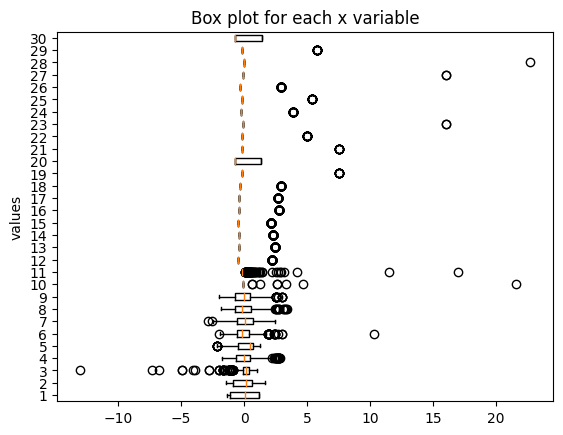

In [31]:
#-------------------Univariate analysis-----------------------------------------------
#constructing box for all x_variables value counts
#Visualizing the data
import matplotlib.pyplot as plt
plt.boxplot(SS_x,vert=False)
plt.title("Box plot for each x variable")
plt.ylabel("values")
plt.show()

array([[<Axes: title={'center': 'month'}>,
        <Axes: title={'center': 'day'}>,
        <Axes: title={'center': 'FFMC'}>,
        <Axes: title={'center': 'DMC'}>, <Axes: title={'center': 'DC'}>],
       [<Axes: title={'center': 'ISI'}>,
        <Axes: title={'center': 'temp'}>, <Axes: title={'center': 'RH'}>,
        <Axes: title={'center': 'wind'}>,
        <Axes: title={'center': 'rain'}>],
       [<Axes: title={'center': 'area'}>,
        <Axes: title={'center': 'dayfri'}>,
        <Axes: title={'center': 'daymon'}>,
        <Axes: title={'center': 'daysat'}>,
        <Axes: title={'center': 'daysun'}>],
       [<Axes: title={'center': 'daythu'}>,
        <Axes: title={'center': 'daytue'}>,
        <Axes: title={'center': 'daywed'}>,
        <Axes: title={'center': 'monthapr'}>,
        <Axes: title={'center': 'monthaug'}>],
       [<Axes: title={'center': 'monthdec'}>,
        <Axes: title={'center': 'monthfeb'}>,
        <Axes: title={'center': 'monthjan'}>,
        <Axes: tit

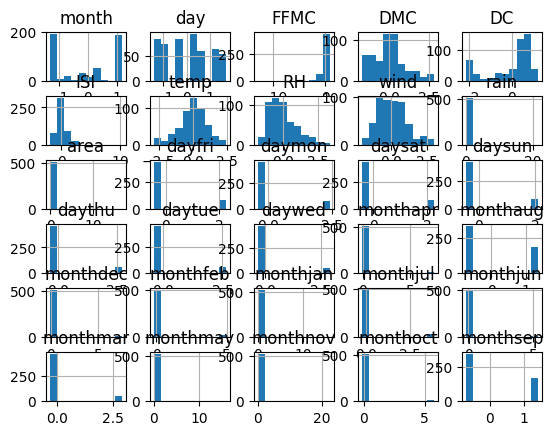

In [32]:
#-------------------Univariate analysis-----------------------------------------------
#constructing histogram for all x_variables value counts
SS_x.hist()

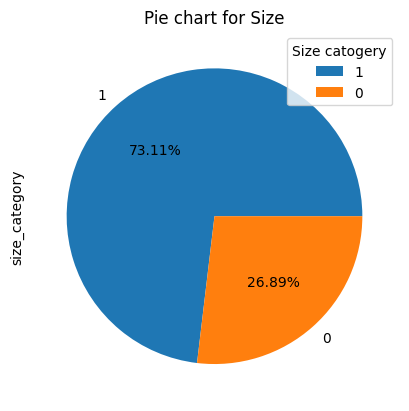

In [33]:
##-------------------Univariate analysis-----------------------------------------------
#constructing pie-chart for type variable value counts

import matplotlib.pyplot as plt
df['size_category'].value_counts().plot(kind='pie',autopct='%1.2f%%')
#autopct='%1.2f%%' ----> it gives what % of single catogery occupied on entire
plt.legend(title="Size catogery") #gives which color is for which one
plt.title("Pie chart for Size")
plt.show()


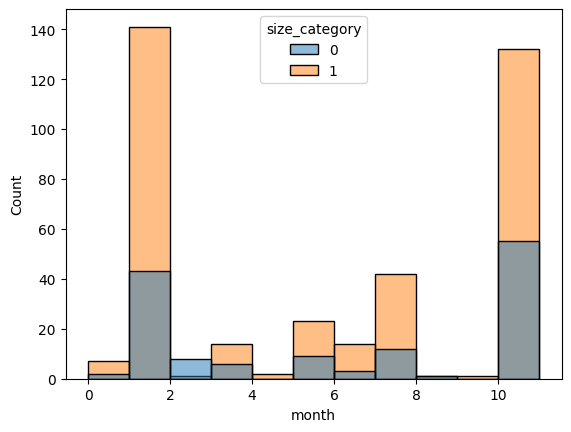

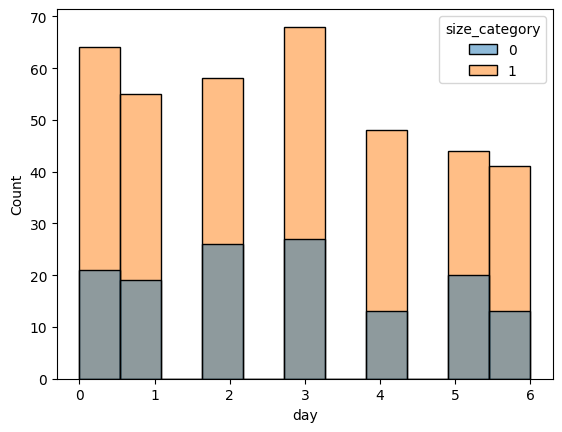

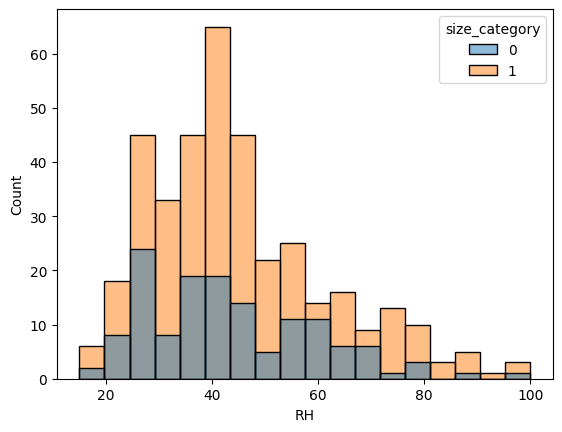

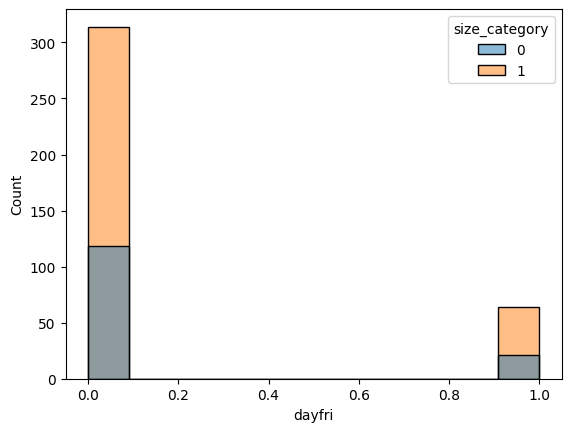

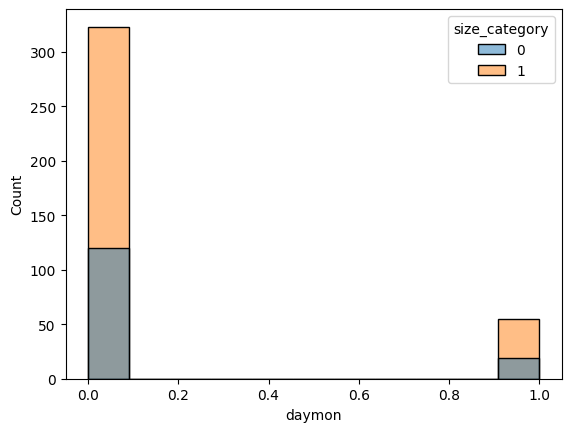

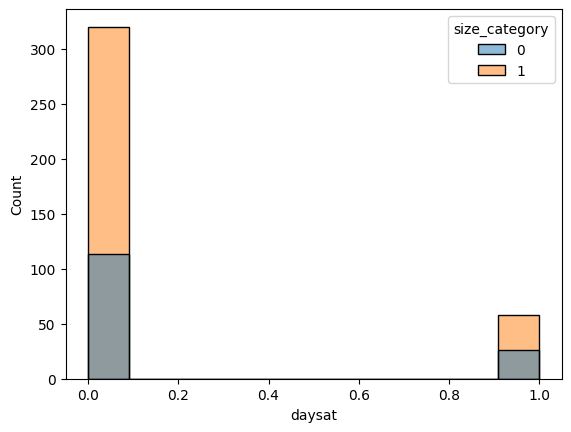

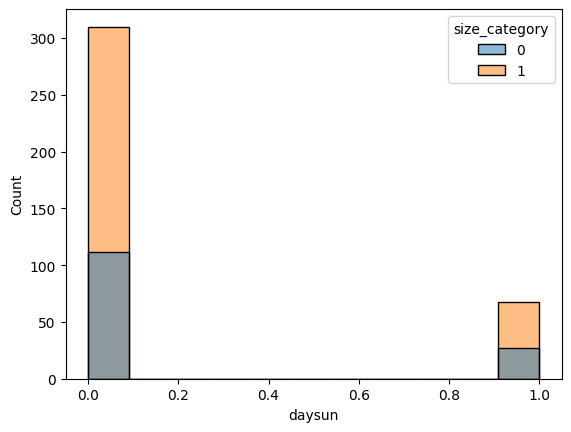

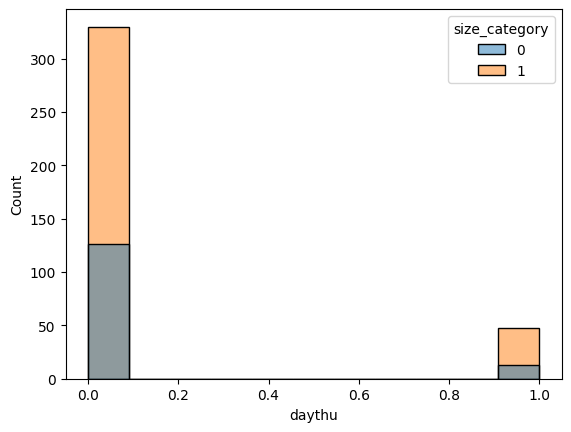

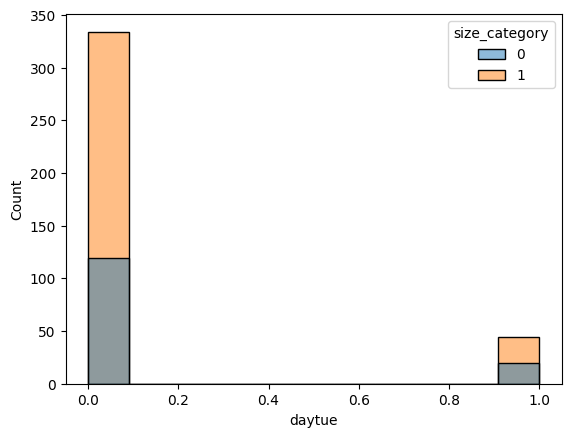

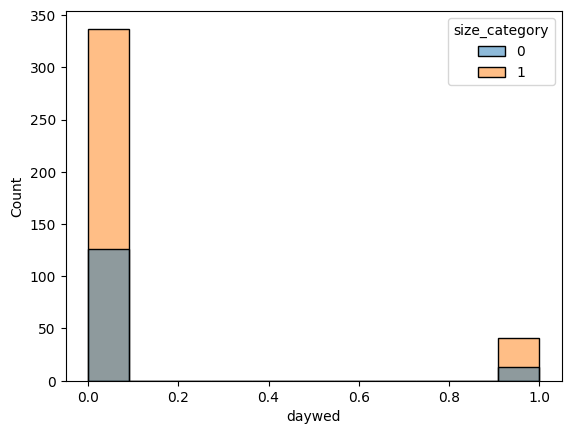

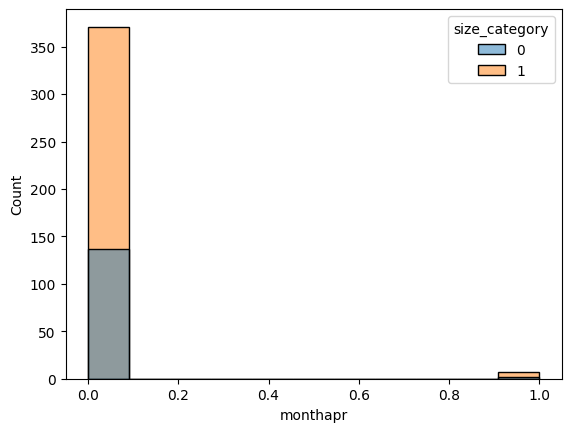

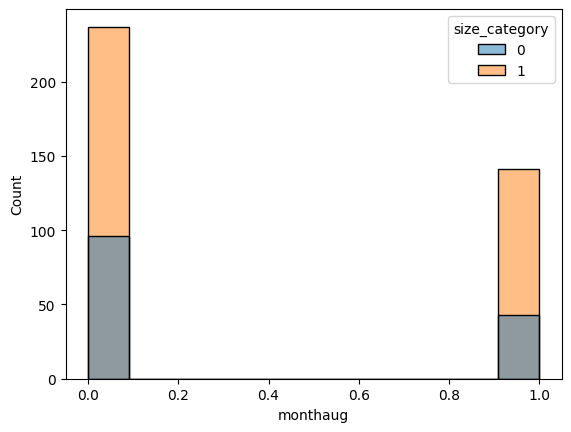

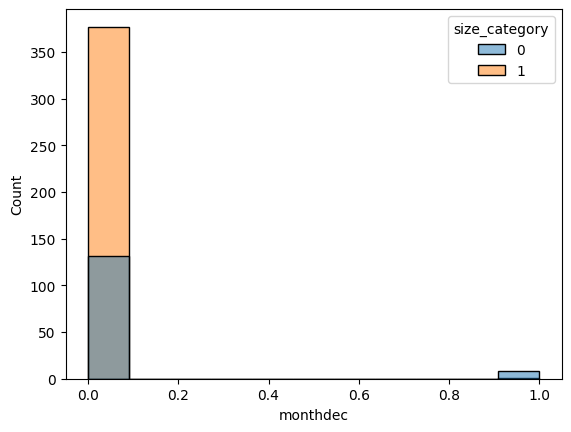

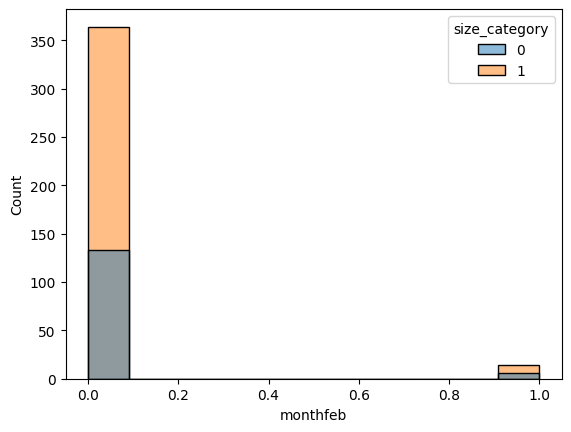

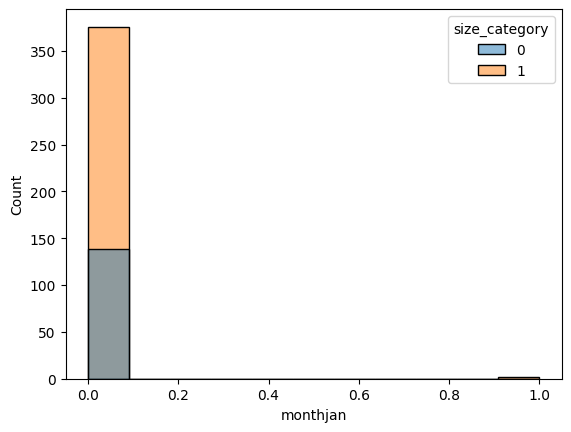

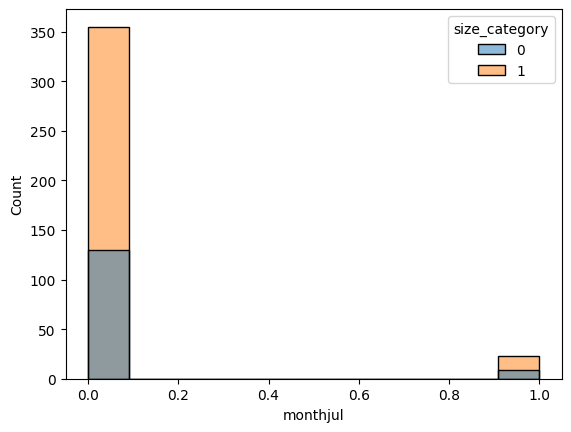

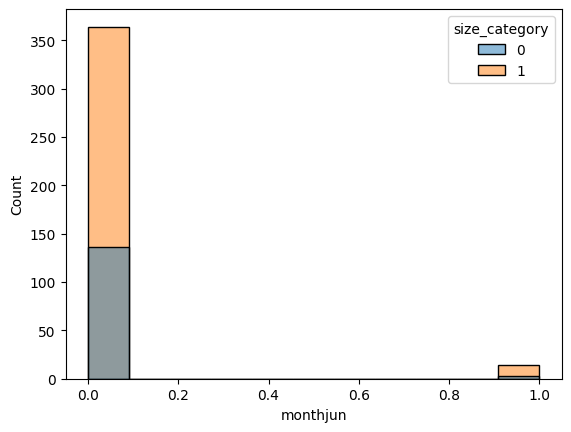

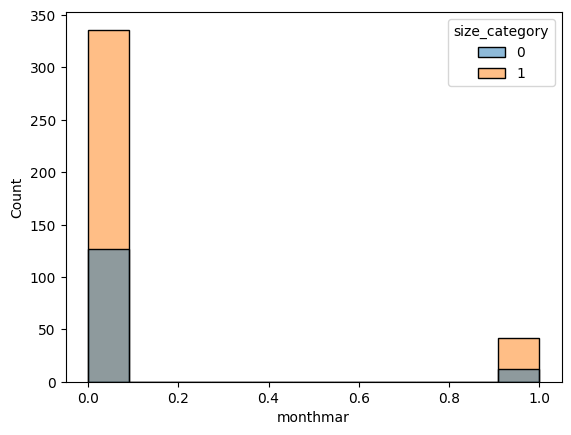

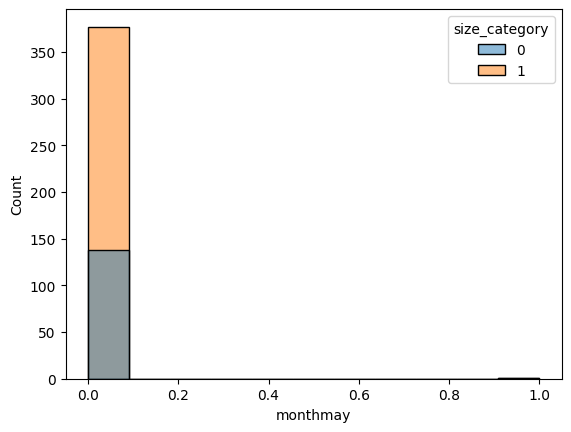

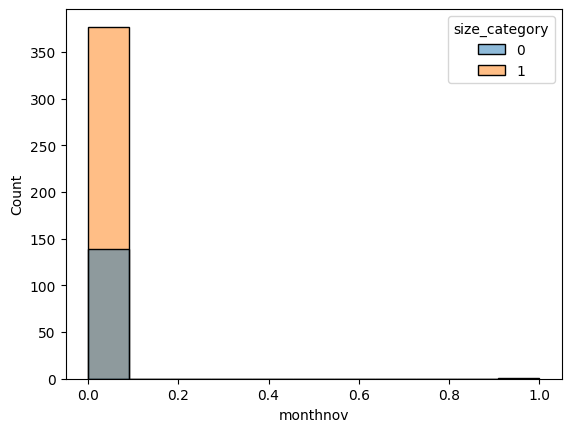

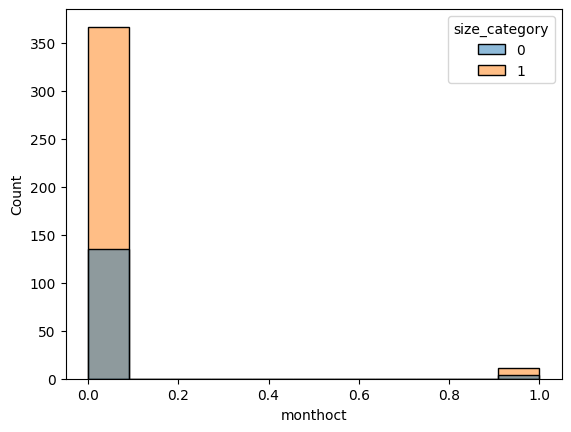

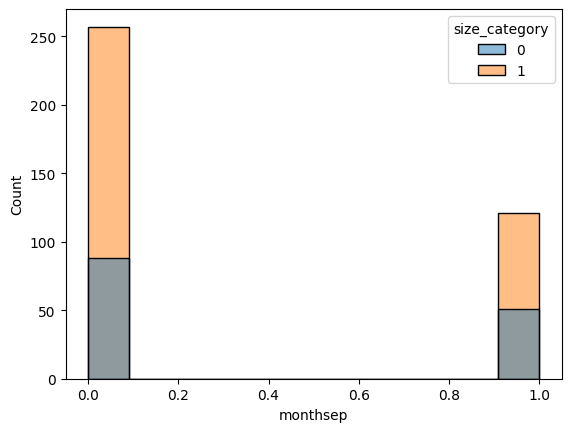

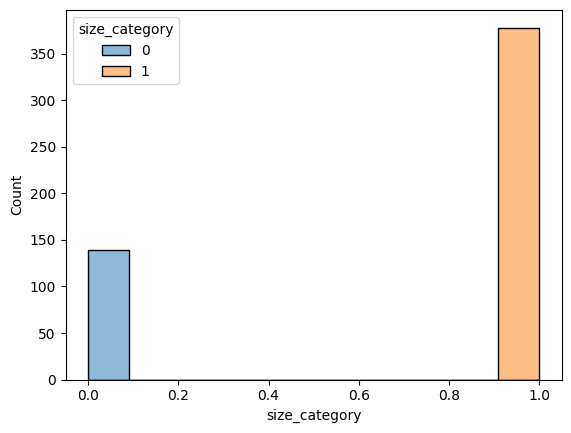

In [34]:
#---------------Bivariate analysis-----------------------------------------------------
#constructiing the histogram plot for all X variables based on size_category
import seaborn as sns
#Histogram for each feature with size_category
for column in df.select_dtypes(include=["int64"]):
    sns.histplot(x=df[column], hue=df['size_category'])
    plt.show()

In [35]:
#constructiing the scatter plot for all X variables at a time
import seaborn as sns
sns.set(style="ticks")
sns.pairplot(SS_x,height=2,aspect=1.5)

Output hidden; open in https://colab.research.google.com to view.